In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from math import exp,sqrt,fabs

# def grad_f(point):
    # x = point[0]
    # y = point[1]
    # return ( np.array(-2*exp(-x**2 - 6*x - y**2 - 6*y - 18)*((x - 3)*exp(12*(x + y)) + 4*(x - 1)*exp(8*(x + y + 2)) + (x + 3)*exp(12*y) + exp(12*x)*(x - 3) + x + 3), -2*exp(-x**2 - 6*x - y**2 - 6*y - 18)*((y - 3)*exp(12*(x + y)) + 4*(y - 1)*exp(8*(x + y + 2)) + exp(12*x)*(y + 3) + exp(12*y)*(y - 3) + y + 3)) )

# def cost_function(point):
        # return fabs(4 - f(point))

epsilon = 1e-5
max_iterations = 1e5
alpha = 0.1
num_iterations = 100

In [2]:
def f(point):
    x = point[0]
    y = point[1]
    return ( 4*exp(-(x**2 + y**2 -2*(x+y-1))) + exp(-((x-3)**2 + (y-3)**2)) + exp(-((x+3)**2 + (y-3)**2)) + exp(-((x-3)**2 + (y+3)**2)) + exp(-((x+3)**2 + (y+3)**2)) )

def get_successors(point,alpha):
    x = point[0]
    y = point[1]
    successors = []
    successors.append(np.array([x + alpha,y]))
    successors.append(np.array([x - alpha,y]))
    successors.append(np.array([x,y + alpha]))
    successors.append(np.array([x,y - alpha]))
    successors.append(np.array([x + alpha/sqrt(2),y + alpha/sqrt(2)]))
    successors.append(np.array([x - alpha/sqrt(2),y + alpha/sqrt(2)]))
    successors.append(np.array([x + alpha/sqrt(2),y - alpha/sqrt(2)]))
    successors.append(np.array([x - alpha/sqrt(2),y - alpha/sqrt(2)]))
    return successors

def get_max_successor(point,alpha):
    successors = get_successors(point,alpha)
    max = -1
    index = -1
    for i, successor in enumerate(successors):
        if f(successor) > max:
            max = f(successor)
            index = i
    return successors[index]

In [3]:
#  Gradient Descent
# current = np.array([np.random.uniform(-5,5),np.random.uniform(-5,5)])
# current = np.array([0,1])
# iterations = 0
# history = [current]
# local_max = []

# while not ((cost_function(current) < epsilon) or (iterations > max_iterations)):
#         current = current + alpha * grad_f(current)
#         history.append(current)
#         iterations = iterations + 1
# print(f"(x,y) = {current}\nvalue = {f(current)}")

In [4]:
# Hill Climbing
history = []
local_max = []

for _ in range(num_iterations):
    iterations = 0
    current = np.array([np.random.uniform(-5,5),np.random.uniform(-5,5)])
    successor = get_max_successor(current,alpha)
    history.append(current)
    while (f(successor) > f(current)) and (iterations < max_iterations):
        current = successor
        successor = get_max_successor(current,alpha)
        iterations+=1
        history.append(current)
    local_max.append(current)

print(f"(x,y) = {current}\nvalue = {f(current)}")

(x,y) = [-2.97902175  2.98955096]
value = 0.9994508916599497


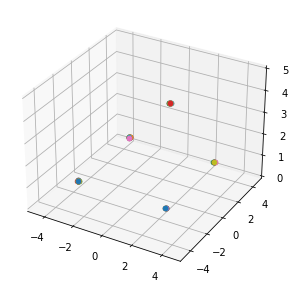

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,5)
for element in local_max:
    ax.scatter3D(element[0],element[1],f(element))
plt.show()

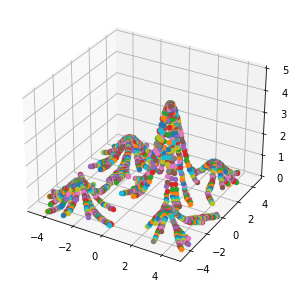

In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,5)
for element in history:
    ax.scatter3D(element[0],element[1],f(element))
plt.show()